# ICTK Competition on Transportation Domain

**Sreehari P S**<br>
*NORKA B5*
***
![title](images/bike.jpg)

***
### <center>Milestone 1 : Data Collection</center>
***

**Dataset location = https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand** <br>
**Explanation:**<br>
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. <br>The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information **between 2 years 2017 to 2018**<br>
**Attribute Information:**<br>
1. Date : year-month-day
2. Rented Bike count - Count of bikes rented at each hour
3. Hour - Hour of he day
4. Temperature-Temperature in Celsius
5. Humidity - %
6. Windspeed - m/s
7. Visibility - 10m
8. Dew point temperature - Celsius
9. Solar radiation - MJ/m2
10. Rainfall - mm
11. Snowfall - cm
12. Seasons - Winter, Spring, Summer, Autumn
13. Holiday - Holiday/No holiday
14. Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)<br>
*Courtesy:*
1. https://archive.ics.uci.edu/ml/index.php 
2. https://www.kaggle.com/
***

### Statement: Regression Problem
From observing this datasets we concluded that it can be used for prediction of bike count required at each hour for the stable supply of rental bikes. So with the help of **Regression** we are building a model which predicts rented bike counts and checking is prediction accuracies.
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

***
### <center>Milestone 2 : Pre-processing</center>
***

#### Load and Basic checks

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv'
bikedata = pd.read_csv('./datasets/SeoulBikeData.csv')
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
bikedata.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [4]:
bikedata.rename(columns = {'Temperature(�C)':'Temperature','Humidity(%)':'Humidity', 'Wind speed (m/s)':'Wind Speed', 
                           'Visibility (10m)':'Visibility', 'Dew point temperature(�C)':'Dew point temperature',
                          'Solar Radiation (MJ/m2)':'Solar Radiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall'}, 
               inplace = True)

In [5]:
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
bikedata.shape

(8760, 14)

There are 8760 rows and 14 columns

In [7]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind Speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

Out of the 13 columns 4 columns are of type 'object', 6 columns of type 'float64' and 4 columns of type 'int64'

#### 01. Missing value handling

In [8]:
bikedata.isna().sum() #check if null needs to be added

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind Speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

There are no values null values present in data set.

#### 02. Outlier detection and handling
***

Shape of dataset befor outlier detection is (8760, 14)

##### Handling outliers

In [9]:
Q1 = bikedata.quantile(0.25)
Q3 = bikedata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count         874.25
Hour                       11.50
Temperature                19.00
Humidity                   32.00
Wind Speed                  1.40
Visibility               1060.00
Dew point temperature      19.50
Solar Radiation             0.93
Rainfall                    0.00
Snowfall                    0.00
dtype: float64


From the above IQR observation it can be observed that for columns "RainFall" and "Snowfall" IQR is **Zero**. Which mean middle 50% data has no variability. So If mean of these 2 are close to Zero then we can remove them. As it wont help in our prediction.

In [10]:
outlier_formula = (bikedata < (Q1-1.5*IQR)) | (bikedata > (Q3 + 1.5*IQR))
bikedata = bikedata[~outlier_formula.any(axis=1)]

In [11]:
print(f'Shape of dataset after outlier removal is {bikedata.shape}')

Shape of dataset after outlier removal is (6922, 14)


#### Extracting feature and Target for further steps
***

In [12]:
X = bikedata.drop('Rented Bike Count', axis = 1) # Feature set
y = pd.DataFrame(bikedata['Rented Bike Count']) # Target

In [13]:
print(f'Shape of feature set = {X.shape} and Shape of Target  = {y.shape}')
print(f'Feature columns = \n {X.columns}')

Shape of feature set = (6922, 13) and Shape of Target  = (6922, 1)
Feature columns = 
 Index(['Date', 'Hour', 'Temperature', 'Humidity', 'Wind Speed', 'Visibility',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')


#### 03. Encoding
***

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6922 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   6922 non-null   object 
 1   Hour                   6922 non-null   int64  
 2   Temperature            6922 non-null   float64
 3   Humidity               6922 non-null   int64  
 4   Wind Speed             6922 non-null   float64
 5   Visibility             6922 non-null   int64  
 6   Dew point temperature  6922 non-null   float64
 7   Solar Radiation        6922 non-null   float64
 8   Rainfall               6922 non-null   float64
 9   Snowfall               6922 non-null   float64
 10  Seasons                6922 non-null   object 
 11  Holiday                6922 non-null   object 
 12  Functioning Day        6922 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 757.1+ KB


We only have 4 'Object' column out of which 3 can be encoded. They are **Seasons, Holiday, Fuctioning Day**. The 4th column **Date** can be engineered to get **Month and Day**

In [15]:
X.nunique()

Date                      356
Hour                       24
Temperature               518
Humidity                   89
Wind Speed                 44
Visibility               1659
Dew point temperature     513
Solar Radiation           233
Rainfall                    1
Snowfall                    1
Seasons                     4
Holiday                     2
Functioning Day             2
dtype: int64

##### One hot encode 'Functioning Day', 'Holiday'

In [16]:
X = pd.get_dummies(data = X, columns=['Functioning Day', 'Holiday'])

##### Label Encode "Seasons" column

In [17]:
from sklearn.preprocessing import LabelEncoder
X['Seasons'] = LabelEncoder().fit_transform(X['Seasons'])

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6922 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   6922 non-null   object 
 1   Hour                   6922 non-null   int64  
 2   Temperature            6922 non-null   float64
 3   Humidity               6922 non-null   int64  
 4   Wind Speed             6922 non-null   float64
 5   Visibility             6922 non-null   int64  
 6   Dew point temperature  6922 non-null   float64
 7   Solar Radiation        6922 non-null   float64
 8   Rainfall               6922 non-null   float64
 9   Snowfall               6922 non-null   float64
 10  Seasons                6922 non-null   int32  
 11  Functioning Day_No     6922 non-null   uint8  
 12  Functioning Day_Yes    6922 non-null   uint8  
 13  Holiday_Holiday        6922 non-null   uint8  
 14  Holiday_No Holiday     6922 non-null   uint8  
dtypes: f

From the above result it can been seen that only one column i.e: "Date" is of object type. This Columns will be handled in **"Feature Engineering"** to get extract new features.

Also encoding increased our features to 15 :)

#### 04. Feature Reduction
***

From our oultier analysis it is clear that columns "Snowfall" and "Rainfall" has Q1, Q3, IQR equals 0. This means these columns has less internal variance. If there mean if also close to 0, we can confidently remove these columns as they wont contribute much to our bike count model. Let's check

In [19]:
np.mean(X[['Snowfall', 'Rainfall']])

Snowfall    0.0
Rainfall    0.0
dtype: float64

So it is clear that these columns wont contribute to our prediction model. i.e ,please choose to take bike for rent even if there is Rnowfall/Rainfall. Strange :). So lets drop them.

In [20]:
X.drop(columns=['Snowfall', 'Rainfall'], axis = 1, inplace = True)

In [21]:
print(f'New feature size is {X.shape[1]}')

New feature size is 13


##### Correlation analysis

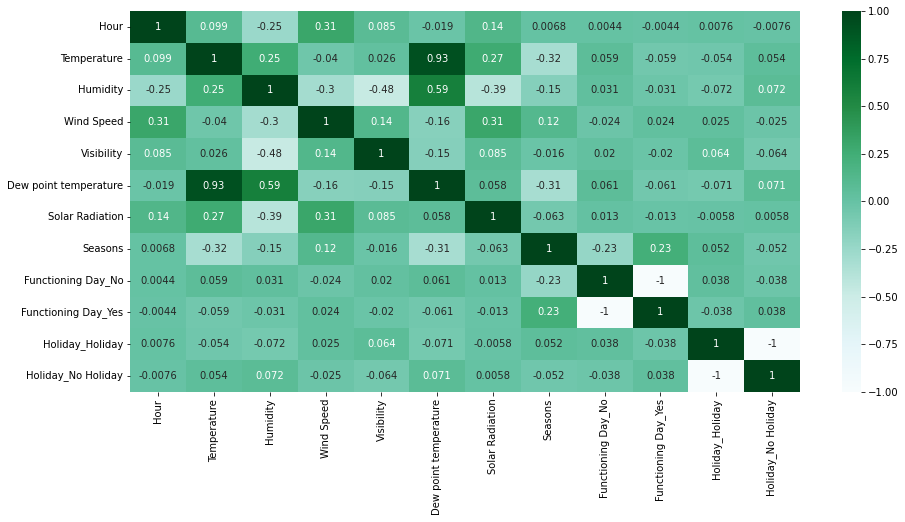

In [22]:
plt.figure(figsize = (15, 7))
sns.heatmap(data = X.corr(), annot= True, cmap = 'BuGn')
plt.show()

From the above heat map it is clear that columns **(Temperature & Dew Point Temperature), (Functioning Day_No & Functioning Day_Yes), (Holiday_Holiday & Holiday_No Holiday)** are highly correlaed to each other so we can remove one which is less correlated to our target.

In [23]:
X.head()

,Date,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew point temperature,Solar Radiation,Seasons,Functioning Day_No,Functioning Day_Yes,Holiday_Holiday,Holiday_No Holiday
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,3,0,1,0,1
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,3,0,1,0,1
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,3,0,1,0,1
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,3,0,1,0,1
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,3,0,1,0,1


In [24]:
X.drop('Date', axis = 1).apply(lambda feature : feature.corr(y['Rented Bike Count']))

Hour                     0.427921
Temperature              0.556699
Humidity                -0.083007
Wind Speed               0.125315
Visibility               0.134144
Dew point temperature    0.429870
Solar Radiation          0.226606
Seasons                 -0.256820
Functioning Day_No      -0.230857
Functioning Day_Yes      0.230857
Holiday_Holiday         -0.081103
Holiday_No Holiday       0.081103
dtype: float64

From the above correlation table of features with target, it is clear that **"Temperature"** is more correlated to our target **"Rented Bike Count"** than **"Dew point temperature"**. So we can drop "Dew point temperature". Same with **"Functioning Day"**.

In [25]:
X.drop(columns=['Dew point temperature','Functioning Day_No', 'Holiday_Holiday'], axis= 1, inplace= True)

In [26]:
print(f'New feature size is {X.shape[1]}')

New feature size is 10


#### 05. Feature Engineering 
***

On analysing the feature set we have a unique column called **"Date"**. At first it seems like it is just a random variable with no impact in model building. But if we look close we can deduct an interesting finding. i.e. They full date specied in Date column is random, but the month and day can will repeat over years. This may give us valuable insights than just random date. So lets extract **Day** and **Month** and drop *Date* column.

In [27]:
# Convert from object to datetime
X['Date'] = pd.to_datetime(X.Date, dayfirst=True)

In [28]:
# New feature 1
X['Day'] = X.Date.dt.day
# New feature 2
X['Month'] = X.Date.dt.month

In [29]:
# Drop Date column
X.drop('Date', axis = 1, inplace=True)

In [30]:
print(f'New feature size is {X.shape[1]}')

New feature size is 11


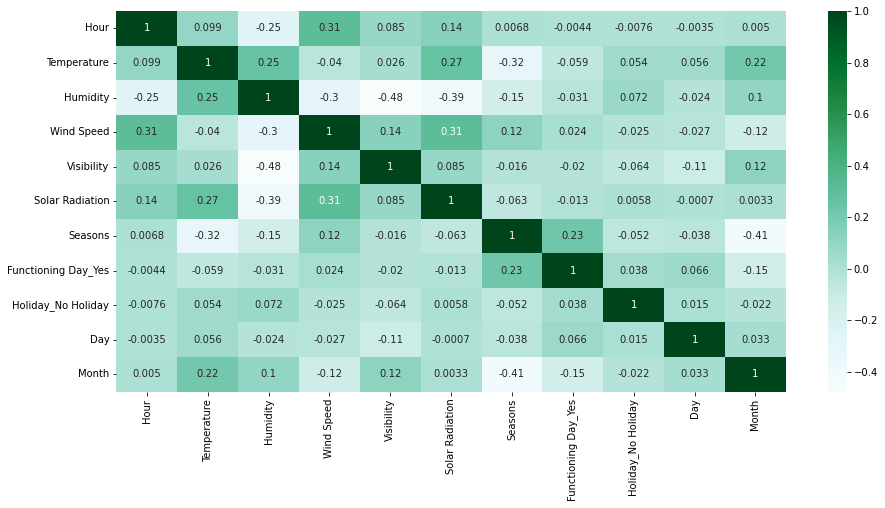

In [31]:
plt.figure(figsize = (15, 7))
sns.heatmap(data = X.corr(), annot= True, cmap = 'BuGn')
plt.show()

#### 06. Standardization / Normalization
***

Since this is a regression problem, standardization is important. To Check whether to use Standardization or Normalization lets visualize distribution of feature space.

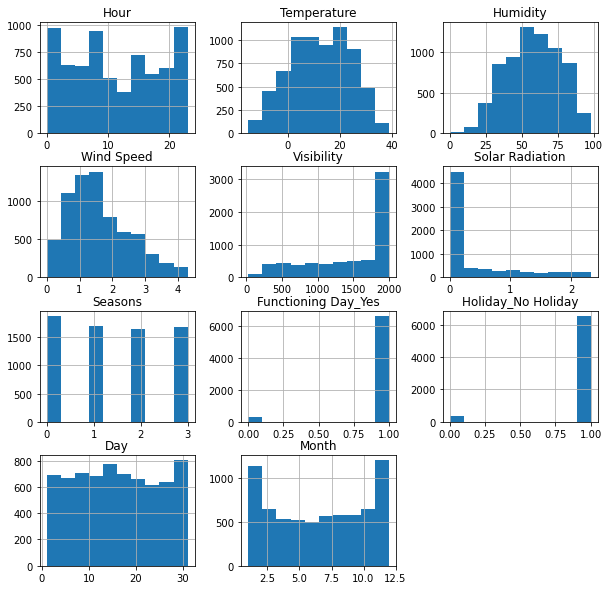

In [32]:
X.hist(figsize = (10, 10))
plt.show()

Since of most columns are Normally distributed we can go for **Standard Scaling**, Season column is Multimodal

In [33]:
# Standard Scaling
X_columns = X.columns
y_columns = y.columns
from sklearn.preprocessing import StandardScaler
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X_columns)
y = pd.DataFrame(StandardScaler().fit_transform(y), columns=y_columns) # target scaling for LinearRegression Model

In [34]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,6922.0,-1.376150e-16,1.000072,-1.559650,-0.867978,-0.176306,0.930370,1.622043
Temperature,6922.0,-7.509162e-16,1.000072,-2.408270,-0.765837,0.011699,0.797970,2.318095
Humidity,6922.0,1.553318e-15,1.000072,-3.087995,-0.738484,0.009087,0.756659,2.145006
Wind Speed,6922.0,7.244839e-17,1.000072,-1.719920,-0.755270,-0.219353,0.638114,2.888966
Visibility,6922.0,2.927768e-15,1.000072,-2.442522,-0.809139,0.440916,0.903962,0.903962
Solar Radiation,6922.0,3.771069e-15,1.000072,-0.635957,-0.635957,-0.635957,0.406836,2.934935
Seasons,6922.0,-6.840847e-15,1.000072,-1.285651,-1.285651,-0.402085,0.481481,1.365047
Functioning Day_Yes,6922.0,1.600834e-14,1.000072,-5.072068,0.197158,0.197158,0.197158,0.197158
Holiday_No Holiday,6922.0,7.833079e-15,1.000072,-4.346355,0.230078,0.230078,0.230078,0.230078
Day,6922.0,-1.333807e-16,1.000072,-1.665173,-0.865535,-0.065897,0.847975,1.761847


***
### <center>Milestone 3 : Exploratory Data Analysis</center>
***

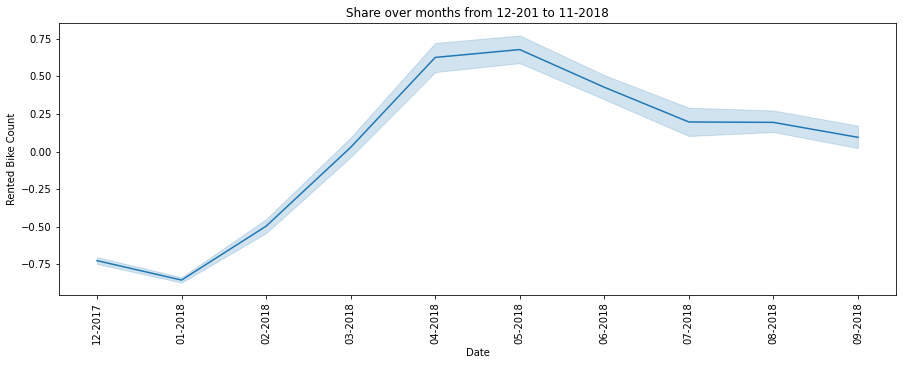

In [68]:
plt.figure(figsize=(15,5))
month_year = pd.to_datetime(bikedata.Date, dayfirst=True).dt.strftime('%m-%Y')
sns.lineplot(x = month_year, y = y['Rented Bike Count'])
plt.xticks(rotation = 90)
plt.title('Share over months from 12-201 to 11-2018')
plt.show()

From the our dataset it can be observed that there is max share occured during months of March/April

#### 01. Univariate Analysis
***

In [35]:
X.columns

Index(['Hour', 'Temperature', 'Humidity', 'Wind Speed', 'Visibility',
       'Solar Radiation', 'Seasons', 'Functioning Day_Yes',
       'Holiday_No Holiday', 'Day', 'Month'],
      dtype='object')

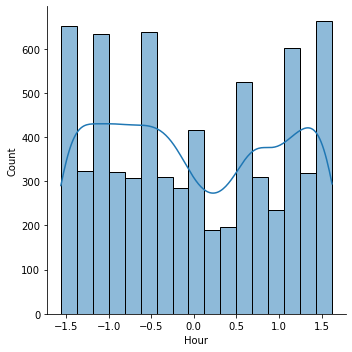

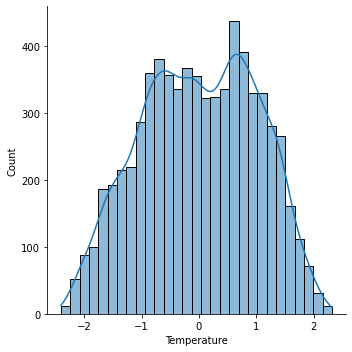

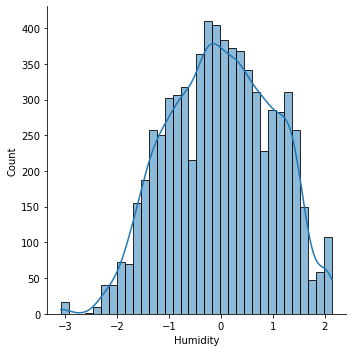

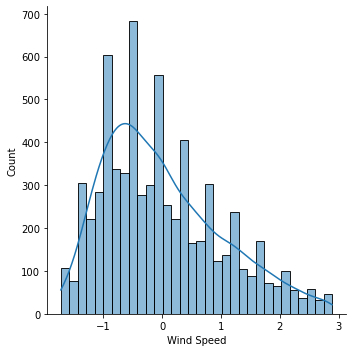

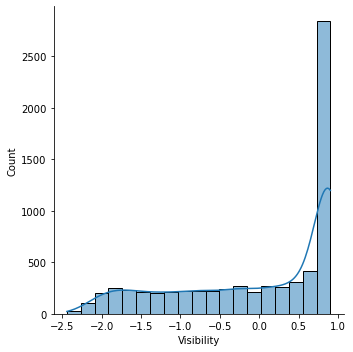

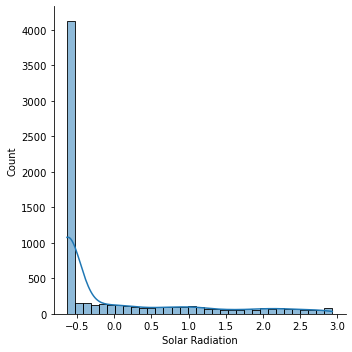

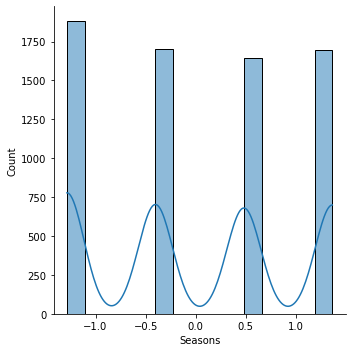

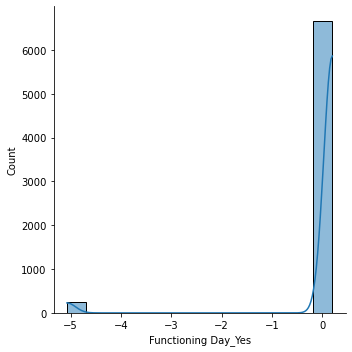

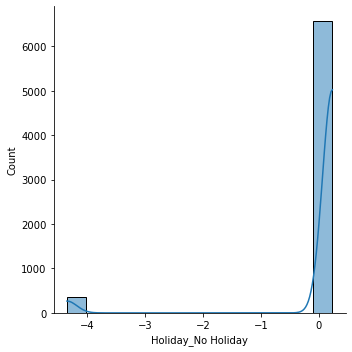

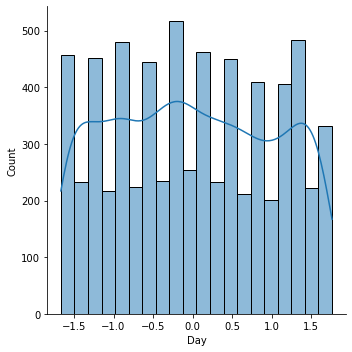

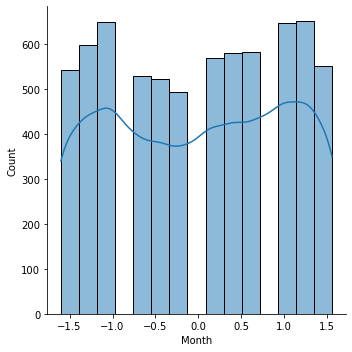

In [36]:
for column in X.columns:
    sns.displot(X[column], rug = False, kde = True)
plt.show()

From the above displot following can be observed :
1. Normal Distribution for Month, Day, Seasons, Humidity, Temperature, Hour
2. Skewed Distribution for Visibility, Solar Radiation, Wind Speed

In [37]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,6922.0,-1.376150e-16,1.000072,-1.559650,-0.867978,-0.176306,0.930370,1.622043
Temperature,6922.0,-7.509162e-16,1.000072,-2.408270,-0.765837,0.011699,0.797970,2.318095
Humidity,6922.0,1.553318e-15,1.000072,-3.087995,-0.738484,0.009087,0.756659,2.145006
Wind Speed,6922.0,7.244839e-17,1.000072,-1.719920,-0.755270,-0.219353,0.638114,2.888966
Visibility,6922.0,2.927768e-15,1.000072,-2.442522,-0.809139,0.440916,0.903962,0.903962
Solar Radiation,6922.0,3.771069e-15,1.000072,-0.635957,-0.635957,-0.635957,0.406836,2.934935
Seasons,6922.0,-6.840847e-15,1.000072,-1.285651,-1.285651,-0.402085,0.481481,1.365047
Functioning Day_Yes,6922.0,1.600834e-14,1.000072,-5.072068,0.197158,0.197158,0.197158,0.197158
Holiday_No Holiday,6922.0,7.833079e-15,1.000072,-4.346355,0.230078,0.230078,0.230078,0.230078
Day,6922.0,-1.333807e-16,1.000072,-1.665173,-0.865535,-0.065897,0.847975,1.761847


#### 02. Multivariate Analysis
***

In [38]:
def plotregplot(x):
    sns.regplot(x = X[x], y= y['Rented Bike Count'], line_kws= {'color':'r'})

##### Temperature vs rent bike count

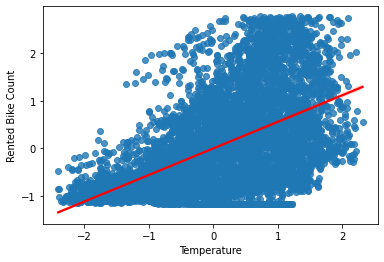

In [39]:
plotregplot('Temperature')

Relationship between Temperature and Rented Bike count is linear, so neccesary for model building

##### Visibility vs Rent Bike Count

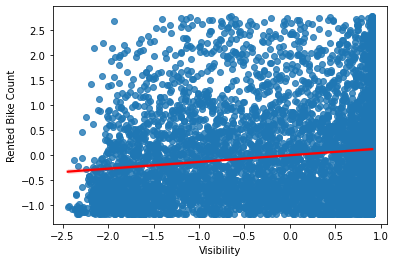

In [40]:
plotregplot('Visibility')

Relation ship between Visibility and Rented Bike count is somewhat linear, but not as good as *Temperature*, so maybe good model building

##### Humidity vs Rented Bike Count

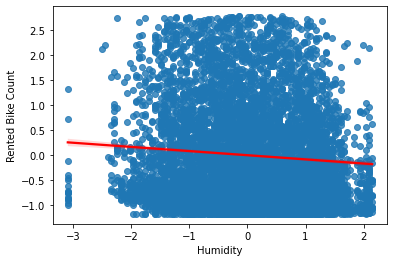

In [41]:
plotregplot('Humidity')

The relationship is somewhat linear, but in opposite direction, maybe good for model building

##### Solar Radiation vs Rented Bike Count

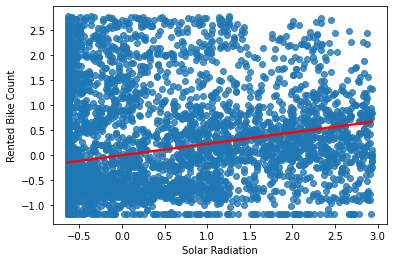

In [42]:
plotregplot('Solar Radiation')

Relationship is quite linear but not as good as Temperature, may be consider for model

##### WindSpeed vs Rented Bike Count

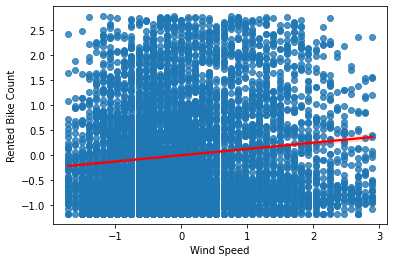

In [43]:
plotregplot('Wind Speed')

The relationship is somewhat linear, maybe good for model building

##### Holiday vs Rented Bike Count #Categorical Comparison

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

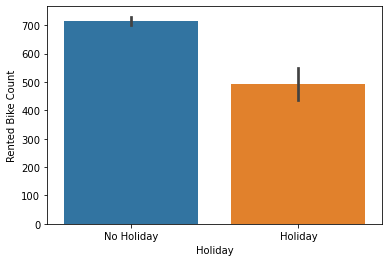

In [44]:
sns.barplot(data = bikedata, x = 'Holiday', y = 'Rented Bike Count')

The holiday count is less than no holiday count. We have already removemd "Holiday" from feature set after encoding.

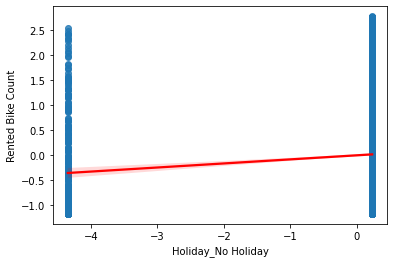

In [45]:
plotregplot('Holiday_No Holiday')

Linearity is low, may remove if needed.

##### Functioning day vs Rented Bike Count #Categorical Comparison

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

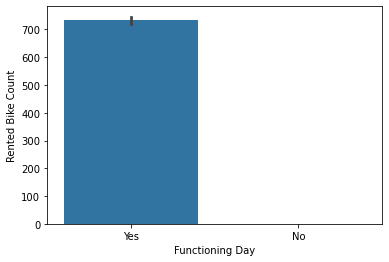

In [46]:
sns.barplot(data = bikedata, x = 'Functioning Day', y = 'Rented Bike Count')

Majority of values belongs to 'Yes', this column acts as unique. Lets Check its linearity with target

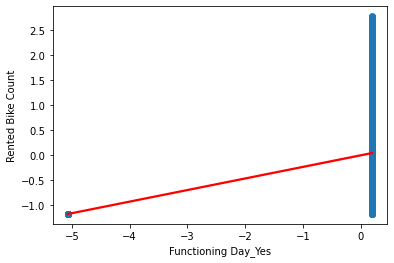

In [47]:
plotregplot('Functioning Day_Yes')

Quite Linear so we can use it in our model

##### Seasons vs Rented Bike Count #Categorical Comparison

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

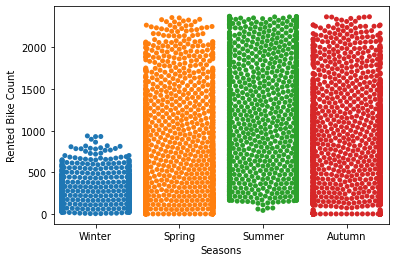

In [48]:
sns.swarmplot(data = bikedata, x = 'Seasons', y = 'Rented Bike Count')

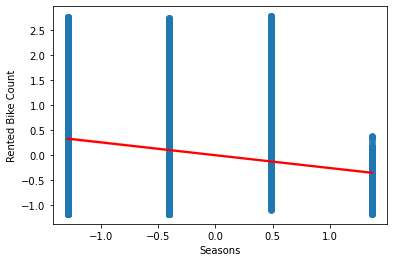

In [49]:
plotregplot('Seasons')

Since there are 4 different values and all 4 contribute substantially to target, we need this column in model.

##### Day vs Rent Bike Count

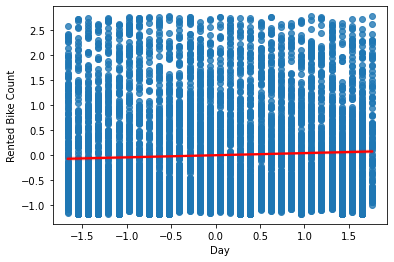

In [50]:
plotregplot('Day')

No Linearity can be droped

##### Hour vs Rented Bike count

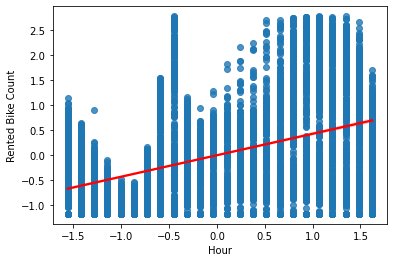

In [51]:
plotregplot('Hour')

Quite Linear relationship exists

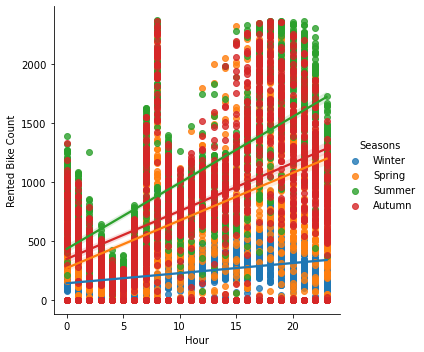

In [52]:
# To check which season has more hour share
sns.lmplot(data = bikedata, x = 'Hour', y = 'Rented Bike Count', hue ='Seasons')

Obviously "Summer" hours has more rentel share followed by Autumn, Sping and at last Winter

***
### <center>Milestone 4 : Modelling</center>
***

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [54]:
from sklearn.metrics import mean_squared_error
def check_error(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE for the model is {mse}')

#### 01. Linear Regression 

In [55]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train, y_train)
print(f'Model slopes are {lr_model.coef_} and model intercept is {lr_model.intercept_}')
lr_pred = lr_model.predict(X_test)
check_error(y_test, lr_pred)

Model slopes are [[ 0.34286705  0.52290662 -0.15471942  0.02078908  0.01267817 -0.03591382
  -0.17805129  0.30960197  0.04341811 -0.02044374  0.0462384 ]] and model intercept is [0.00073195]
MSE for the model is 0.42212661920064354


#### 02. Random forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor().fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
check_error(y_test, rf_pred)

MSE for the model is 0.1265813958076114


#### 03. XGBoost Regressor

In [57]:
from xgboost import XGBRegressor
xgb_model = RandomForestRegressor().fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
check_error(y_test, xgb_pred)

MSE for the model is 0.1270959014068317


***
### <center>Milestone 5 : Model Fine Tuning</center>
***

#### Finetuning Random Forest Model
***

In [59]:
#Feature importance
pd.Series(rf_model.feature_importances_, index= X.columns).sort_values(ascending=False)*100

Hour                   32.207537
Temperature            31.960377
Functioning Day_Yes    11.644018
Solar Radiation         7.520902
Humidity                4.975854
Seasons                 3.620391
Month                   2.002992
Day                     1.916001
Visibility              1.907631
Wind Speed              1.865380
Holiday_No Holiday      0.378916
dtype: float64

In [60]:
ut = X_train.drop('Holiday_No Holiday', axis = 1)
uw = X_test.drop('Holiday_No Holiday', axis = 1)

In [61]:
rf_new = RandomForestRegressor().fit(ut, y_train)
rf_new_pred = rf_new.predict(uw)
check_error(y_test, rf_new_pred)

MSE for the model is 0.130925526147859


Eliminating column 'Eliminating column' didn't improve accuracy

##### Using RandomizedSearchCV to find best params

In [62]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 222, 244, 266, 288, 311, 333, 355, 377, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [63]:
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 12, 14, 16, 18, 20,
                                                      22, 24, 26, 28, 30,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 222, 244, 266,
                                                         288, 311, 333, 355,
                                                         377, 400]},
                   random_state=42, verbose=2)

In [64]:
best_rf = rf_random.best_estimator_

In [65]:
print(f'Best Hyper Parameters for Random Forest are ::\n {best_rf.get_params()}')

Best Hyper Parameters for Random Forest are ::
 {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 222, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [66]:
best_rf_pred = best_rf.predict(X_test)
check_error(y_test, best_rf_pred)

MSE for the model is 0.11875400591983991


And our Random Forsest Model error has reduced

***